## Clustering and Classification
**FIZ371 - Scientific & Technical Computations | 27/05/2020**

**Clustering and Classification**
* Introduction
* Advantages of Clustering
    * Predictive Power!
    * Lossy Compression!
        * Vector Quantizer
    * Highlighting Anomalies!
    * Learning Processes in Neural Systems (next week's topic 8)
* k-means Clustering
    * The algorithm (Verbal)
    * The algorithm (Formular)
* Implementation of the k-means clustering algorithm
    * Merge them all into one code
* Soft k-means Clustering
* Homework
* Reference
  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Introduction

Suppose that we are given the following list, and asked to single out the odd one:

* Frog
* Parsley
* Brocoli
* Spinach
* Cauliflower

Depending on our background, we will be picking one of these two:

*Frog*, because the rest are vegetables, or,  
*Cauliflower*, because the rest are green.

We spend our lives by clustering and classification, because otherwise we wouldn't be able to process the world happening around ourselves.

# Advantages of Clustering
## Predictive Power!
A biologist encounters a new green thing he has not seen before. Even though this is the first time he has seen it, based on his experience, he can assume/deduce that:
* it is unlikely to jump on him and eat him
* if he touches it, he might get grazed/stung
* if he eats it, he might feel sick
These deductions are a case of "mixture density modelling". How well the model is working is the information content of the data $\left(h(x)=\log{\frac{1}{P(x)}}\right)$.

## Lossy Compression!
"Go to third tree on the right, then take a right turn."

Third tree? *Large green thing with red berries, then past the large green thing with thorns, then...*

* lossy: e.g., image compression (jpg); sound compression (mp3) | (vector quantization)
* lossless: image (png, raw); sound (flac)

### Vector Quantizer 
$$\vec{x}\rightarrow k(\vec{x})$$
Assigning datapoints $\vec{x}$ to one of $K$ codenames and a reconstruction rule $k \rightarrow \vec{m}^{(k)}$ to choose the functions $k(\vec{x})$ and $\vec{m}^{(k)}$ so as to minimize the expected distortion:
$$D=\sum_{\vec{x}}{P(\vec{x})\,\frac{1}{2}\left[\vec{m}^{(k(\vec{x}))}-\vec{x}\right]^2 }$$

## Highlighting Anomalies!
If there is an anomaly --> it's a good thing!

**Examples:** 
* The incompressible patches on ocean from a satellite image --> ships/islands
* The sudden peak at the input signals --> some kind of communication signal
* if the green thing runs away --> misfit with the model (something new, something interesting)!

## Learning Processes in Neural Systems!
(Next week's topic 8)

# k-means Clustering
Putting $N$ data points in an $I$-dimensional space into $k$-clusters. Each cluster is parameterized by a vector $\vec{m}^{(k)}$, called its *mean*.

Data points: $\left\{\vec{x}^{(n)}\right\},\quad n=1,\dots,N$

Each vector $\vec{x}$ has $I$ components: $x_i$.

The metric that defines distances between points:
$$d(\vec{x},\vec{y}) = \frac{1}{2}\sum_{i}{\left(x_i - y_i\right)^2}$$
(this metric assumes that every component has the same importance)

## The algorithm (Verbal)
0. **Initializement Step:** Set $k$ means $\left\{\vec{m}^{(k)}\right\}$ to random values.

Two-step algorithm:
1. **Assignment step:** Each data point $n$ is assigned to the nearest mean.
2. **Update step:** Means are adjusted to match the sample means of the data points that they are responsible for.

=> The k-means algorithm always converges to a fixed point!

## The algorithm (Formular)
0. **Initializement Step:** Set $k$ means $\left\{\vec{m}^{(k)}\right\}$ to random values.

Two-step algorithm:
1. **Assignment step:** Each data point $n$ is assigned to the nearest mean. We denote our guess for the cluster $k^{(n)}$ that the point $x^{(n)}$ belongs to by $\hat{k}^{(n)}$:$$\hat{k}^{(n)}=\text{argmin}_k \left\{{d\left(\vec{m}^{(k)},x^{(n)}\right)}\right\}$$
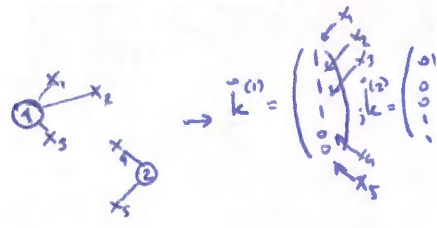
*alternative approach:* responsibilities as indicator variables $r_k^{(n)}$ $$r_k^{(n)}=\begin{cases}
  1\;\text{if}\,\hat{k}^{(n)}=k\\    
  0\;\text{if}\,\hat{k}^{(n)}\ne k
\end{cases} $$
(if there is a tie, set to the smallest winning $\{k\}$).
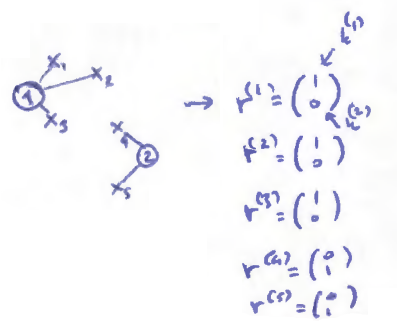
2. **Update step:** Means are adjusted to match the sample means of the data points that they are responsible for. $$\vec{m}^{(k)} = \frac{\sum_{n}{r_k^{(n)}\vec{x^{(n)}}}}{R^{(k)}}$$
$R^{(k)}$: Total responsibility of mean $k$: $$R^{(k)} = \sum_{n}{r_k^{(n)}}$$

if $R^{(k)} = 0$ (no responsibility), we leave the mean $\vec{m}^{(k)}$ where it is.
3. Repeat the assignment & update steps until the assignments do not change any more.


# Implementation of the k-means clustering algorithm

[[6.70757519 2.86347836]
 [2.93989879 4.06199567]
 [3.5415221  4.95529743]
 [8.84969585 2.32867583]
 [0.764246   4.04569698]
 [6.95932464 2.24383386]
 [5.38073582 3.66695416]
 [8.20034856 4.42849815]
 [9.17613437 3.18660447]
 [2.01990761 2.95942273]]


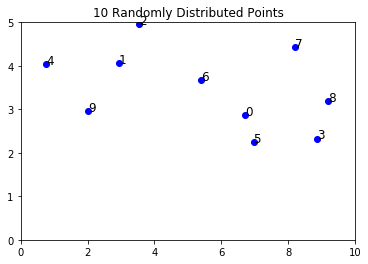

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(371)
colors = ["b","g","c","m","y","k","b","g","c","m","y","k"]

N = 10 ## Total number of points
K = 3  ## Total number of means

## World Limits
max_x = 10 
max_y = 5

## Randomly generate the points
xy = np.random.rand(N,2)
xy[:,0]*=max_x
xy[:,1]*=max_y

print(xy)
plt.plot(xy[:,0],xy[:,1],"ob")
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.title("{:d} Randomly Distributed Points".format(N))
plt.show()

[[0.54368606 1.27995751]
 [7.16375897 0.66801486]
 [5.8648529  2.79201826]]


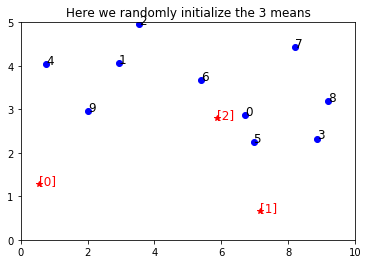

In [2]:
## Step 0: Initialize the means at random points
m = np.random.rand(K,2)
m[:,0] *= max_x
m[:,1] *= max_y

print(m)
plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.plot(xy[:,0],xy[:,1],"ob")
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
plt.plot(m[:,0],m[:,1],"*r")
for k in range(K):
    plt.text(m[k,0],m[k,1],"["+str(k)+"]",color="red",fontsize=12)
plt.title("Here we randomly initialize the {:d} means".format(K))
plt.show()

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
0 [False False False False  True False False False False  True]
1 [False False False  True False False False False  True False]
2 [ True  True  True False False  True  True  True False False]


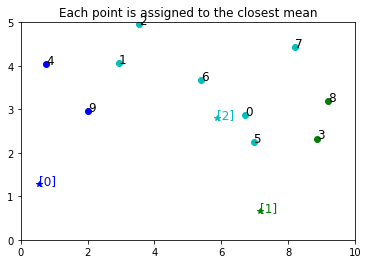

In [3]:
## Step 1: Assign the responsibilities of each point to the nearest mean
r = np.zeros((N,K))

## Calculate the distance of each point to each mean
def distance(i,k):
    ## Calculates the distance of the ith point to the kth mean
    d = np.linalg.norm((xy[i,0]-m[k,0],xy[i,1]-m[k,1]))
    return d

distances = np.empty((N,K))
for i in range(N):
    for k in range(K):
        distances[i,k] = distance(i,k)
    filter = distances[i,:] == min(distances[i,:])
    # print(filter)
    # print(np.arange(K)[filter])
    ## Assign the responsibilities
    r[i,np.arange(K)[filter]] = 1
print(r)

for k in range(K):
    this_k_set_filter = (r[:,k] == 1)
    print (k,this_k_set_filter)
    plt.plot(xy[this_k_set_filter][:,0],xy[this_k_set_filter][:,1],"o"+colors[k])
    plt.plot(m[k,0],m[k,1],"*"+colors[k])
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
for k in range(K):
    plt.text(m[k,0],m[k,1],"["+str(k)+"]",color=colors[k],fontsize=12)
plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.title("Each point is assigned to the closest mean")
plt.show()
  

[1.3920768  3.50255985]
[9.01291511 2.75764015]
[5.62156752 3.70334294]


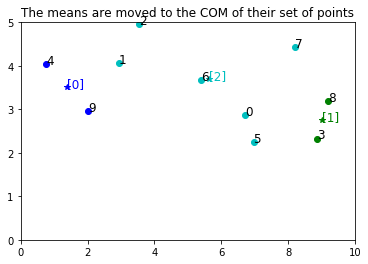

In [4]:
## Step 2: Update the means' locations so that
## they reside in the center of mass of their points

for k in range(K):
    this_k_set_filter = (r[:,k] == 1)
    # print(xy[this_k_set_filter])
    # print(np.sum(this_k_set_filter))
    mean_k = np.sum(xy[this_k_set_filter],axis=0)/np.sum(this_k_set_filter)
    print(mean_k)
    m[k,:] = mean_k
    plt.plot(xy[this_k_set_filter][:,0],xy[this_k_set_filter][:,1],"o"+colors[k])
    plt.plot(m[k,0],m[k,1],"*"+colors[k])
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
for k in range(K):
    plt.text(m[k,0],m[k,1],"["+str(k)+"]",color=colors[k],fontsize=12)

plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.title("The means are moved to the COM of their set of points")
plt.show()


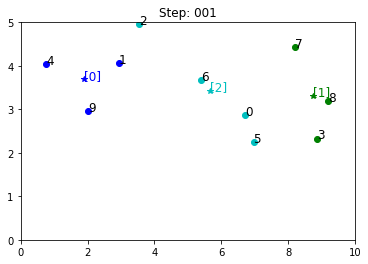

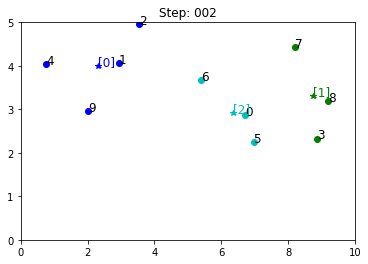

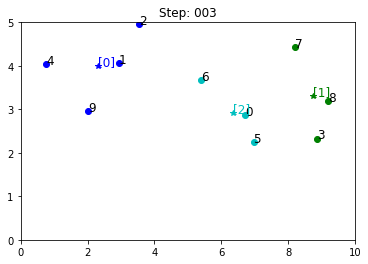

In [5]:
## Step 3: Repeat steps 1 & 2 until there is no change

m_prev = np.zeros((K,2))

step = 1
while(not np.array_equal(m_prev,m)):
    m_prev = m.copy()
    ## Step 1: Assign the responsibilities of each point to the nearest mean
    r = np.zeros((N,K))

    distances = np.empty((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = distance(i,k)
        filter = distances[i,:] == min(distances[i,:])

        ## Assign the responsibilities
        r[i,np.arange(K)[filter]] = 1

    ## Step 2: Update the means' locations so that
    ## they reside in the center of mass of their points

    for k in range(K):
        this_k_set_filter = (r[:,k] == 1)
        mean_k = np.sum(xy[this_k_set_filter],axis=0)/np.sum(this_k_set_filter)
        m[k,:] = mean_k
        plt.plot(xy[this_k_set_filter][:,0],xy[this_k_set_filter][:,1],"o"+colors[k])
        plt.plot(m[k,0],m[k,1],"*"+colors[k])
    for i in range(N):
        plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
    for k in range(K):
        plt.text(m[k,0],m[k,1],"["+str(k)+"]",color=colors[k],fontsize=12)

    plt.xlim([0,max_x])
    plt.ylim([0,max_y])
    plt.title("Step: {:03d}".format(step))
    plt.show()
    step += 1


## Merge them all into one code:

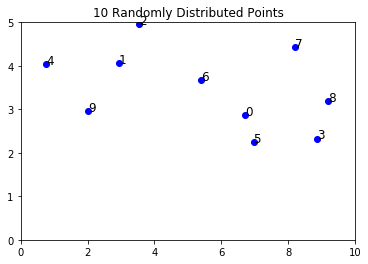

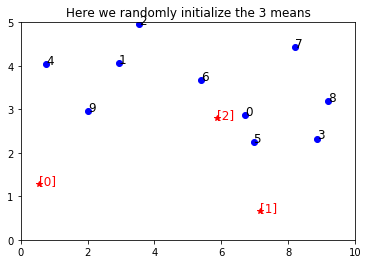

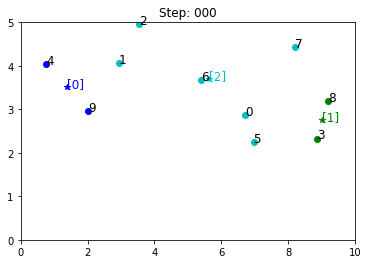

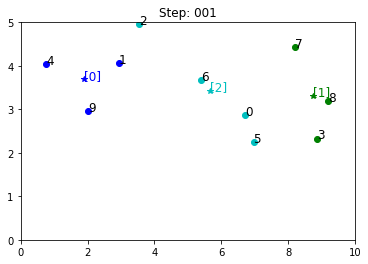

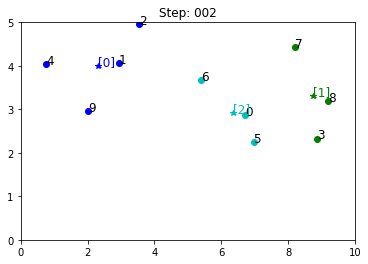

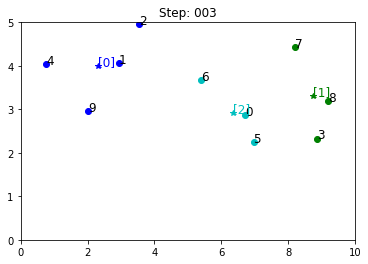

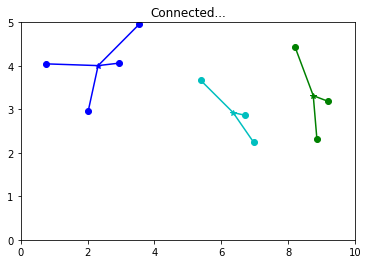

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(371)
colors = ["b","g","c","m","y","k","b","g","c","m","y","k"]

N = 10 ## Total number of points
K = 3  ## Total number of means

## World Limits
max_x = 10 
max_y = 5

## Randomly generate the points
xy = np.random.rand(N,2)
xy[:,0]*=max_x
xy[:,1]*=max_y

plt.plot(xy[:,0],xy[:,1],"ob")
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.title("{:d} Randomly Distributed Points".format(N))
plt.show()

## -------------------------------------------------------

## Step 0: Initialize the means at random points
m = np.random.rand(K,2)
m[:,0] *= max_x
m[:,1] *= max_y

plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.plot(xy[:,0],xy[:,1],"ob")
for i in range(N):
    plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
plt.plot(m[:,0],m[:,1],"*r")
for k in range(K):
    plt.text(m[k,0],m[k,1],"["+str(k)+"]",color="red",fontsize=12)
plt.title("Here we randomly initialize the {:d} means".format(K))
plt.show()

## -------------------------------------------------------

## Calculate the distance of each point to each mean
def distance(i,k):
    ## Calculates the distance of the ith point to the kth mean
    d = np.linalg.norm((xy[i,0]-m[k,0],xy[i,1]-m[k,1]))
    return d

## -------------------------------------------------------

## Step 3: Repeat steps 1 & 2 until there is no change

m_prev = np.zeros((K,2))

step = 0
while(not np.array_equal(m_prev,m)):
    m_prev = m.copy()
    ## Step 1: Assign the responsibilities of each point to the nearest mean
    r = np.zeros((N,K))

    distances = np.empty((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = distance(i,k)
        filter = distances[i,:] == min(distances[i,:])

        ## Assign the responsibilities
        r[i,np.arange(K)[filter]] = 1

    ## Step 2: Update the means' locations so that
    ## they reside in the center of mass of their points

    for k in range(K):
        this_k_set_filter = (r[:,k] == 1)
        mean_k = np.sum(xy[this_k_set_filter],axis=0)/np.sum(this_k_set_filter)
        m[k,:] = mean_k
        plt.plot(xy[this_k_set_filter][:,0],xy[this_k_set_filter][:,1],"o"+colors[k])
        plt.plot(m[k,0],m[k,1],"*"+colors[k])
    for i in range(N):
        plt.text(xy[i,0],xy[i,1],str(i),fontsize=12)
    for k in range(K):
        plt.text(m[k,0],m[k,1],"["+str(k)+"]",color=colors[k],fontsize=12)

    plt.xlim([0,max_x])
    plt.ylim([0,max_y])
    plt.title("Step: {:03d}".format(step))
    plt.show()
    step += 1

## Let's also connect the points to their assigned means for a nice view:
for k in range(K):
    this_k_set_filter = (r[:,k] == 1)
    mean_k = np.sum(xy[this_k_set_filter],axis=0)/np.sum(this_k_set_filter)
    m[k,:] = mean_k
    for i in range(np.sum(this_k_set_filter)):
        plt.plot(xy[this_k_set_filter][i,0],xy[this_k_set_filter][i,1],"o"+colors[k])
        plt.plot(np.array([xy[this_k_set_filter][i,0],m[k,0]]),np.array([xy[this_k_set_filter][i,1],m[k,1]]),"-"+colors[k])
    plt.plot(m[k,0],m[k,1],"*"+colors[k])
plt.xlim([0,max_x])
plt.ylim([0,max_y])
plt.title("Connected...")
plt.show()

# Soft k-means Clustering
To overcome the bad cases, and also to deal with the following issues (also related to bad cases):
1. Assignment step problem/issue: A point is strictly owned only by one mean -- no matter if it is just next to the mean or at the border of the mean's influence.
2. Update step problem/issue: Every point owned by the mean has exactly the same weight in influencing the mean's new position. However, "everyday logic" (*physics(!)*) dictates/suggests that the further the point, the less influence it has.

These two issues are actually different manifestations of the same problem. The *hardness* of the k-means algorithm can be *softened* by allowing <u>partial ownership</u>, hence the **soft k-means clustering**:

1. Assignment Step: Responsibility vector (the responsibility of cluster $k$ for point $n$) $r_k^{(n)}$ is redefined by: $$r_k^{(n)}=\frac{\exp\left(-\beta\,d\left(\vec{m}^{(k)},x^{(n)}\right)\right)}{\sum_{k'}{\exp\left(-\beta\,d\left(\vec{m}^{(k')},x^{(n)}\right)\right)} }$$ where $\beta$ is the *softness parameter* $(\beta\rightarrow\infty\Rightarrow\text{Hard k-means algorithm.})$ The sum of the k-responsibilities for the $n^{th}$ point is 1 (due to the normalizing constant, that is the denominator).
2. Update step: It is identical to the *hard k-means algorithm*: $$\vec{m}^{(k)} = \frac{\sum_{n}{r_k^{(n)}\vec{x^{(n)}}}}{R^{(k)}},\quad R^{(k)} = \sum_{n}{r_k^{(n)}}$$


# Homework
1. Justify the soft k-means clustering's usefulness with a solid case.

2. Propose / find an application of the k-means clustering method in any branch of physics.

# Reference
Our usual (and wonderful) course textbook: [David MacKay's "Information Theory, Inference, and Learning Algorithms"](http://www.inference.org.uk/mackay/itila/book.html).